Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

#Task-1

Downloading the dataset from Google Drive

In [2]:
!gdown --id 1bTtIDHMP6a5dQ3a2Aw9AAR8Flprjb3Ei

Downloading...
From: https://drive.google.com/uc?id=1bTtIDHMP6a5dQ3a2Aw9AAR8Flprjb3Ei
To: /content/data.csv
100% 527k/527k [00:00<00:00, 17.2MB/s]


Reading the csv file into a pandas dataframe. The number of samples is equal to the length of the index of the dataframe.

In [3]:
data = pd.read_csv('/content/data.csv')
print('Number of samples is', len(data.index))

Number of samples is 4600


A pandas dataframe is similar to a Python dictionary and can be accessed in the same manner.

In [4]:
print('The column names are:')
for column in data.keys():
  print(column, end=', ')

The column names are:
date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, sqft_above, sqft_basement, yr_built, yr_renovated, street, city, statezip, country, 

The `isnull()` function is used to find whether an entry is null or not. It returns Boolean value. The count of these values is done using `sum()`

In [5]:
print('The null values in each column are:')
print(data.isnull().sum())

The null values in each column are:
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


Every dataframe has an attribute called `dtypes` which indicates the data type of the columns of the data frame.

In [6]:
print('The data type of each column is:')
print(data.dtypes)

The data type of each column is:
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object


Now, we look at the first 5 columns of the dataset using `head()`

In [7]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


We look at the summary statistics of the dataset using  ```describe()```


In [8]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


#Task-2

Except date and price, all the other columns can be feature columns. However, street, city, statezip, and country are given in string datatype. To make them features, we need to map them to some integer or float value. For the sake of simplicity, we are excluding those columns. So, the feature columns are *bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, sqft_above, sqft_basement, yr_built, yr_renovated*. These are feature columns because the predicting column price is dependent on these columns.

The predicting column is *price* as we want to predict house prices. The feature and predicting columns are stored in X and Y variables respectively.

In [9]:
features =  ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']
X = data[features]
Y = data['price']

#Task-3

Using `test_train_split()` from scikit-learn, we divide the dataset into training and testing sets. The `test_size` defines the percentage of data for the test dataset and is set to `0.2` as required by the question. Shuffling the data before splitting is a prerequisite to ensure randomized distribution and hence, `shuffle` is set to `True`.

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, shuffle = True)

#Task-4

We first define some necessary helper functions to help us perform gradient descent.

The  ```mean_square_error(y_pred, y)``` is used to calculate the mean square error from the predicted and actual values of y.

In [11]:
def mean_square_error(y_pred, y):
  '''
  Parameters: 
    y_pred = predicted output of the model with shape (m,1)
              where, m is the number of training examples
    y = actual output with shape (m,1)
  Returns:
    cost = a scalar value giving the error/loss for
            all the training examples
  '''
  m = y_pred.shape[0]
  cost = np.sum(np.power((y - y_pred),2))/(2*m)
  return cost

The ```concat_one(X)``` is used to concatenate a row of ones at the top to an input matrix X.

In [12]:
#Concatenates a row of ones
def concat_one(X):
  '''
  Parameters:
    X = a matrix of shape (n,m)
        where, n is number of input features
  Returns:
    one_concat = a matrix with a column of ones concatenated
                to the X matrix and has shape (n+1,m)
  '''
  n = X.shape[0]
  m = X.shape[1]
  one_column = np.ones((1,m))
  one_concat = np.concatenate((one_column, X), axis = 0)
  return one_concat

The ```normalize(x)``` is used to pre-process the input features by scaling them. The scaling is performed by subtracting the min and dividing by the range of a particular feature row.

In [13]:
def normalize(x):
  '''
  Parameters:
    x = a matrix of shape (n,m)
  Returns:
    x_norm = the normalized form of matrix x
             with shape (n,m)
  '''
  xt = x.T
  m = xt.shape[0]

  for i in range(m):
    col = xt[i]
    max = col.max()
    min = col.min()
    r = max - min
    xt[i] = (xt[i]- min)/r
    x_norm = xt.T
  return x_norm

#Task-4a

The ```gradient_descent(x, y, epoch = 100, alpha = 0.01, epsilon = 0.5)``` performs multiple steps of gradient descent, and returns the updated parameters and a list of costs. The function performs a step of forward and a step of backward propagation in each epoch. After each step, it calculates the gradients and stores it. Then it updates the parameters simulatenously. Then, it checks whether it made any significant update in the previous two steps or not. Finally, it returns the stored cost list and the updated parameter theta.

In [14]:
def gradient_descent(x, y, epoch = 100, alpha = 0.01, epsilon = 0.5):
  '''Parameters:
    X = input feature matrix of dimensions (n,m) where 
        m is the number of training examples,
        n is the number of features
    Y = output matrix of dimensions (m,1)
    epoch = number of steps taken by gradient descent
            default value is set to 100
    alpha = learning rate
            default value is set to 0.01
    epsilon = threshold of minimum difference
              default value is set to 0.4
    Returns:
      theta = parameter matrix of dimensions (n,1)
      cost_list = list of loss
  '''
  cost_list = []
  x = concat_one(x)
  n = x.shape[0]
  m = x.shape[1]
  
  theta = np.zeros((n,1))
  
  for epoch in range(epoch):
    y_hat = np.dot(np.transpose(x), theta)
    dtheta = (np.dot(x, y_hat - y))/m
    theta = theta - alpha*dtheta
    
    cost = mean_square_error(y, y_hat)
    cost_list.append(cost)

    #Task - 4a
    #Checks if error difference is less than epsilon
    #Epsilon = 0.5 by default
    if len(cost_list)>1:
      if (cost_list[-2] - cost_list[-1])/cost_list[-1] <= epsilon:
        break    

  return theta, cost_list  

We perform some basic pre-processing to the data by coverting it the series to numpy arrays, transposing them and normalizing them.

In [15]:
x_train = np.array(X_train.T)
y_train = np.array(Y_train).reshape(Y_train.shape[0],1)

x_train_norm = normalize(x_train)
y_train_norm = normalize(y_train)

#Task-4b

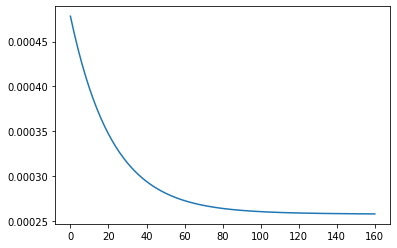

In [16]:
theta, cost = gradient_descent(x_train_norm, y_train_norm, alpha = 0.01, epoch = 1000, epsilon = 0.00005)
plt.plot(cost)
plt.show()

In [17]:
print('The stopping epoch is 160') #From the graph

The stopping epoch is 160


#Task-4c

We show the effect of various step sizes on the training and testing set.

In [18]:
theta1, cost1 = gradient_descent(x_train, y_train, alpha = 0.1, epoch = 1000, epsilon = 0)
theta2, cost2 = gradient_descent(x_train, y_train, alpha = 0.03, epoch = 1000, epsilon = 0)
theta3, cost3 = gradient_descent(x_train, y_train, alpha = 0.01, epoch = 1000, epsilon = 0)
theta4, cost4 = gradient_descent(x_train, y_train, alpha = 0.003, epoch = 1000, epsilon = 0)

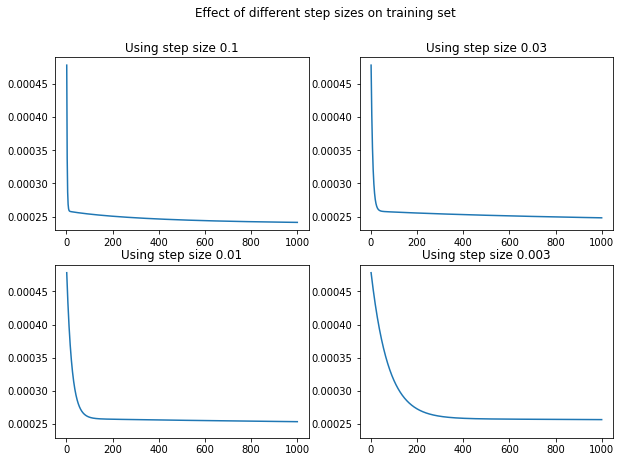

In [19]:
fig = plt.figure(figsize=(10,7))
fig.suptitle('Effect of different step sizes on training set')
gs  = gridspec.GridSpec(2,2)
a1 = plt.subplot(gs[0])
a2 = plt.subplot(gs[1],sharex = a1, sharey = a1)
a3 = plt.subplot(gs[2],sharex = a1, sharey = a1)
a4 = plt.subplot(gs[3],sharex = a1, sharey = a1)

x = list(range(1,1001))
y1 = cost1
a1.plot(x,y1)
_ = a1.set_title('Using step size 0.1')

y2 = cost2
a2.plot(x,y2)
_ = a2.set_title('Using step size 0.03')

y3 = cost3
a3.plot(x,y3)
_ = a3.set_title('Using step size 0.01')

y4 = cost4
a4.plot(x,y4)
_ = a4.set_title('Using step size 0.003')

plt.show()

#Task-5

In [20]:
model = LinearRegression().fit(x_train.T, y_train)
model.coef_

array([[-1.31597708e+01,  2.32377409e+00,  7.84907927e+02,
        -2.38302039e-02,  8.14498569e+00,  2.23505250e+02,
         1.03571471e+01,  1.38819774e+01, -7.84851924e+02,
        -7.84854030e+02, -6.88350918e-02,  2.94759390e-03]])

In [21]:
y_pred = model.predict(x_train.T)

In [22]:
cost = mean_square_error(y_pred, y_train)
print(cost)

0.0002293351374772889


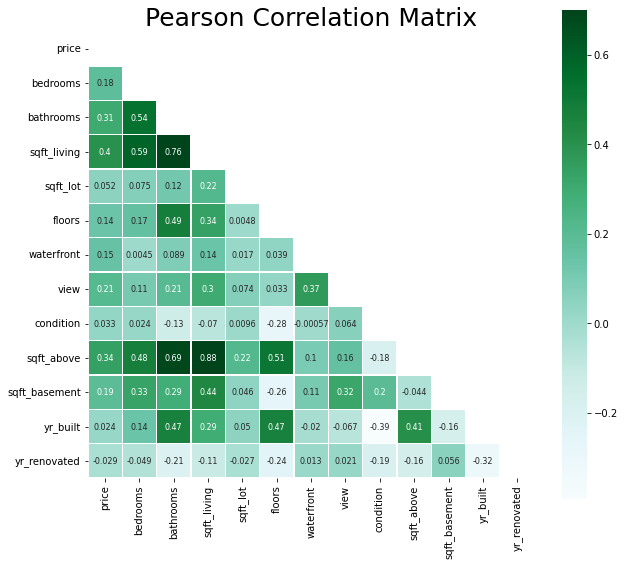

In [23]:
training_data = X_train.copy()
training_data.insert(0,'price',Y_train)
features = ['price','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated']
mask = np.zeros_like(training_data[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(10, 10))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(training_data[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

From the matrix, we select the features that are highly correlated with the price but not correlated with each other.
The features with high correlation with the price are *bedrooms, bathrooms, sqft_living, floors, waterfront, view, sqft_above, sqft_basement*. After removing the features correlated with each other, we have, *sqft_living, floors,view,waterfront*.

In [36]:
selected_features = ['sqft_living', 'floors', 'view', 'waterfront']
X_train_selected = X_train[selected_features]
x_train_selected = np.array(X_train_selected)

new_model = LinearRegression().fit(x_train_selected, y_train)
y_pred_new = new_model.predict(x_train_selected)

In [37]:
new_cost = mean_square_error(y_pred_new, y_train)
print('The old MSE is:', cost)
print('The new MSE is:', new_cost)
if (new_cost<cost):
  print('MSE value decreases after handpicking features.')
else:
  print("MSE value doesn't decrease after handpicking features.")

The old MSE is: 0.0002293351374772889
The new MSE is: 0.0002134595454811767
MSE value decreases after handpicking features.
